#  1. Import Required Libraries 

In [138]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from geopy.geocoders import Nominatim 
from geopy.exc import GeocoderTimedOut 
from IPython.display import display, HTML
import time
from folium.plugins import HeatMap
import folium 
import plotly.express as px

# 2. Load Datasets 

In [3]:
data1 = pd.read_csv(r"C:\Users\shaik\Downloads\zomato_data.csv")  
data1

,online_order,book_table,rate,votes,rest_type,dish_liked,cuisines,approx_costfor_two_people,listed_intype,listed_incity
0,Yes,Yes,4.1/5,775,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Yes,No,4.1/5,787,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,Buffet,Banashankari
2,Yes,No,3.8/5,918,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,No,No,3.7/5,88,Quick Bites,Masala Dosa,"South Indian, North Indian",300,Buffet,Banashankari
4,No,No,3.8/5,166,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...
51712,No,No,3.6 /5,27,Bar,NaN,Continental,"1,500",Pubs and bars,Whitefield
51713,No,No,NaN,0,Bar,NaN,Finger Food,600,Pubs and bars,Whitefield
51714,No,No,NaN,0,Bar,NaN,Finger Food,"2,000",Pubs and bars,Whitefield
51715,No,Yes,4.3 /5,236,Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500",Pubs and bars,Whitefield


In [5]:
print(data1.head())

  online_order book_table   rate  votes            rest_type  \
0          Yes        Yes  4.1/5    775        Casual Dining   
1          Yes         No  4.1/5    787        Casual Dining   
2          Yes         No  3.8/5    918  Cafe, Casual Dining   
3           No         No  3.7/5     88          Quick Bites   
4           No         No  3.8/5    166        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines approx_costfor_two_people listed_intype  \
0  North Indian, Mughlai, Chinese                       800        Buffet   
1     Chinese, North Indian, Thai                       800        Buffet   
2          Cafe, Mexican, Italian              

In [13]:
print(data1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  object 
 1   book_table                 51717 non-null  object 
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int64  
 4   rest_type                  51490 non-null  object 
 5   dish_liked                 23639 non-null  object 
 6   cuisines                   51672 non-null  object 
 7   approx_costfor_two_people  51371 non-null  object 
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.9+ MB
None


In [119]:
geo = pd.read_csv(r"C:\Users\shaik\Downloads\Geographical Coordinates.csv")  
geo

,listed_incity,Latitude,Longitude
0,Banashankari,12.939333,77.553982
1,Bannerghatta Road,12.952660,77.605048
2,Basavanagudi,12.941726,77.575502
3,Bellandur,12.925352,77.675941
4,Brigade Road,12.967358,77.606435
5,Brookefield,12.963814,77.722437
6,BTM,12.916360,77.604733
7,Church Street,12.974914,77.605247
8,Electronic City,12.848760,77.648253
9,Frazer Town,12.998683,77.615525


In [121]:
print(geo.head())

       listed_incity   Latitude  Longitude
0       Banashankari  12.939333  77.553982
1  Bannerghatta Road  12.952660  77.605048
2       Basavanagudi  12.941726  77.575502
3          Bellandur  12.925352  77.675941
4       Brigade Road  12.967358  77.606435


In [123]:
print(geo.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   listed_incity  26 non-null     object 
 1   Latitude       26 non-null     float64
 2   Longitude      26 non-null     float64
dtypes: float64(2), object(1)
memory usage: 756.0+ bytes
None


# 3. Data Cleaning and Preprocessing

### Clean 'rate' column

In [7]:
# Step 1: Replace '-' with NaN
data1['rate'] = data1['rate'].replace('-', np.nan)

# Step 2: Remove '/5' and retain only the numeric value
data1['rate'] = data1['rate'].str.replace('/5', '', regex=False)

# Step 3: Convert to float using pd.to_numeric
data1['rate'] = pd.to_numeric(data1['rate'], errors='coerce')

# Step 4: Fill missing values with the median rating
median_rating = data1['rate'].median()
data1['rate'] = data1['rate'].fillna(median_rating)

# Display the first few rows to verify the changes
print(data1[['rate']].head())

   rate
0   4.1
1   4.1
2   3.8
3   3.7
4   3.8


In [11]:
print(data1['rate'].describe())

count    51717.000000
mean         3.700362
std          0.395391
min          1.800000
25%          3.500000
50%          3.700000
75%          3.900000
max          4.900000
Name: rate, dtype: float64


In [23]:
print("\nMissing values in 'rate':",data1['rate'].isnull().sum())
print("\n")


Missing values in 'rate': 0




### Clean 'approx_cost(for two people)' column

In [17]:
# Convert to string first, then remove commas
data1['approx_costfor_two_people'] = data1['approx_costfor_two_people'].astype(str).str.replace(',', '')

# Then convert to numeric
data1['approx_costfor_two_people'] = pd.to_numeric(data1['approx_costfor_two_people'], errors='coerce')

# Fill missing values with the median cost
median_cost = data1['approx_costfor_two_people'].median()
data1['approx_costfor_two_people'] = data1['approx_costfor_two_people'].fillna(median_cost)

print(data1[['rate', 'approx_costfor_two_people']].head())

   rate  approx_costfor_two_people
0   4.1                      800.0
1   4.1                      800.0
2   3.8                      800.0
3   3.7                      300.0
4   3.8                      600.0


In [31]:
print("After processing 'approx_costfor_two_people' column:")
print(data1['approx_costfor_two_people'].describe())

After processing 'approx_costfor_two_people' column:
count    51717.000000
mean       554.391689
std        437.563723
min         40.000000
25%        300.000000
50%        400.000000
75%        650.000000
max       6000.000000
Name: approx_costfor_two_people, dtype: float64


In [33]:
print("\nMissing values in 'approx_costfor_two_people':", data1['approx_costfor_two_people'].isnull().sum())
print("\n")


Missing values in 'approx_costfor_two_people': 0




## Categorical Columns

In [38]:
# Replace NaN in 'dish_liked' with "Not Available"
data1['dish_liked'] = data1['dish_liked'].fillna("Not Available")

# Replace NaN in 'cuisines' with "Other"
data1['cuisines'] = data1['cuisines'].fillna("Other")

# Replace NaN in 'rest_type' with "Unknown"
data1['rest_type'] = data1['rest_type'].fillna("Unknown")

# Display the first few rows to verify the changes
print(data1[['rate', 'approx_costfor_two_people', 'dish_liked', 'cuisines', 'rest_type']].head())

   rate  approx_costfor_two_people  \
0   4.1                      800.0   
1   4.1                      800.0   
2   3.8                      800.0   
3   3.7                      300.0   
4   3.8                      600.0   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines            rest_type  
0  North Indian, Mughlai, Chinese        Casual Dining  
1     Chinese, North Indian, Thai        Casual Dining  
2          Cafe, Mexican, Italian  Cafe, Casual Dining  
3      South Indian, North Indian          Quick Bites  
4        North Indian, Rajasthani        Casual Dining  


In [40]:
print("After processing categorical columns:")
print(data1[['dish_liked', 'cuisines', 'rest_type']].isnull().sum())

After processing categorical columns:
dish_liked    0
cuisines      0
rest_type     0
dtype: int64


## Votes Column

In [43]:
# Fill missing values with the median votes
median_votes = data1['votes'].median()
data1['votes'] = data1['votes'].fillna(median_votes)

In [45]:
print("After processing 'votes' column:")
print(data1['votes'].describe())
print("\nMissing values in 'votes':",data1['votes'].isnull().sum())

After processing 'votes' column:
count    51717.000000
mean       283.697527
std        803.838853
min          0.000000
25%          7.000000
50%         41.000000
75%        198.000000
max      16832.000000
Name: votes, dtype: float64

Missing values in 'votes': 0


## Binary Encoding

In [48]:
# Convert 'online_order','book_table' to binary (Yes → 1, No → 0)
data1['online_order'] = data1['online_order'].map({'Yes': 1, 'No': 0})
data1['book_table'] = data1['book_table'].map({'Yes': 1, 'No': 0})

In [50]:
print("After binary encoding 'online_order' and 'book_table':")
print(data1[['online_order', 'book_table']].head())

After binary encoding 'online_order' and 'book_table':
   online_order  book_table
0             1           1
1             1           0
2             1           0
3             0           0
4             0           0


In [54]:
print(data1[['online_order', 'book_table']].isnull().sum())

online_order    0
book_table      0
dtype: int64


In [52]:
print(data1[['online_order', 'book_table']].dtypes)

online_order    int64
book_table      int64
dtype: object


## Data Type Conversion

In [57]:
# Ensure 'rate' is float
data1['rate'] = data1['rate'].astype(float)

# Convert 'votes' to integer
data1['votes'] = data1['votes'].astype(int)

# Convert 'approx_costfor_two_people' to integer
data1['approx_costfor_two_people'] = data1['approx_costfor_two_people'].astype(int)

In [59]:
print(data1[['rate', 'votes', 'approx_costfor_two_people']].describe())

               rate         votes  approx_costfor_two_people
count  51717.000000  51717.000000               51717.000000
mean       3.700362    283.697527                 554.391689
std        0.395391    803.838853                 437.563723
min        1.800000      0.000000                  40.000000
25%        3.500000      7.000000                 300.000000
50%        3.700000     41.000000                 400.000000
75%        3.900000    198.000000                 650.000000
max        4.900000  16832.000000                6000.000000


In [61]:
print(data1[['rate', 'votes', 'approx_costfor_two_people']].isnull().sum())

rate                         0
votes                        0
approx_costfor_two_people    0
dtype: int64


In [63]:
print(data1[['rate', 'votes', 'approx_costfor_two_people']].dtypes)

rate                         float64
votes                          int32
approx_costfor_two_people      int32
dtype: object


In [81]:
# Final verification of the entire dataset
print(data1.info())
print(data1.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   online_order               51717 non-null  int64  
 1   book_table                 51717 non-null  int64  
 2   rate                       51717 non-null  float64
 3   votes                      51717 non-null  int32  
 4   rest_type                  51717 non-null  object 
 5   dish_liked                 51717 non-null  object 
 6   cuisines                   51717 non-null  object 
 7   approx_costfor_two_people  51717 non-null  int32  
 8   listed_intype              51717 non-null  object 
 9   listed_incity              51717 non-null  object 
dtypes: float64(1), int32(2), int64(2), object(5)
memory usage: 3.6+ MB
None
online_order                 0
book_table                   0
rate                         0
votes                        0
rest_type         

# 4. Merge Location Data 

In [73]:
geo_df = pd.read_csv(r"C:\Users\shaik\Downloads\Geographical Coordinates.csv")  

In [75]:
merged_data1 = pd.merge(data1, geo_df, on='listed_incity', how='left')
print(merged_data1.head())

   online_order  book_table  rate  votes            rest_type  \
0             1           1   4.1    775        Casual Dining   
1             1           0   4.1    787        Casual Dining   
2             1           0   3.8    918  Cafe, Casual Dining   
3             0           0   3.7     88          Quick Bites   
4             0           0   3.8    166        Casual Dining   

                                          dish_liked  \
0  Pasta, Lunch Buffet, Masala Papad, Paneer Laja...   
1  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
2  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
3                                        Masala Dosa   
4                                Panipuri, Gol Gappe   

                         cuisines  approx_costfor_two_people listed_intype  \
0  North Indian, Mughlai, Chinese                        800        Buffet   
1     Chinese, North Indian, Thai                        800        Buffet   
2          Cafe, Mexican, Italian     

# 5 Exploratory Data Analysis (EDA) 

Text(0, 0.5, 'Rating')

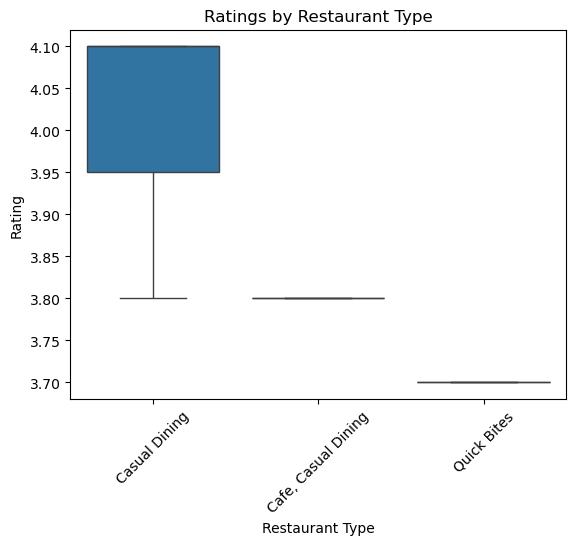

In [85]:
# Box Plot of Ratings by Restaurant Type
plt.subplot(1, 1, 1)
sns.boxplot(x='rest_type', y='rate', data=data1.head())
plt.title("Ratings by Restaurant Type")
plt.xticks(rotation=45)
plt.xlabel("Restaurant Type")
plt.ylabel("Rating")

Text(0, 0.5, 'Rating')

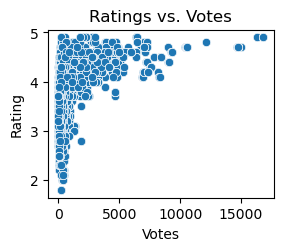

In [87]:
# Scatter Plot of Ratings vs. Votes
plt.subplot(2, 2, 3)
sns.scatterplot(x='votes', y='rate', data=data1)
plt.title("Ratings vs. Votes")
plt.xlabel("Votes")
plt.ylabel("Rating")

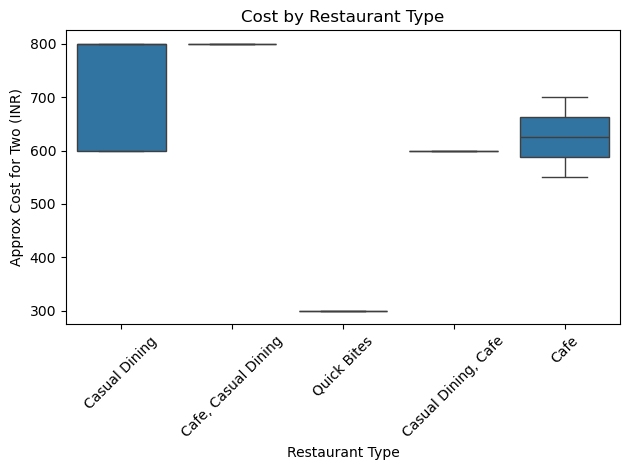

In [89]:
# Box Plot of Cost by Restaurant Type
plt.subplot(1, 1, 1)
sns.boxplot(x='rest_type', y='approx_costfor_two_people', data=data1.head(10))
plt.title("Cost by Restaurant Type")
plt.xticks(rotation=45)
plt.xlabel("Restaurant Type")
plt.ylabel("Approx Cost for Two (INR)")
plt.tight_layout()
plt.show()

Text(0, 0.5, 'Frequency')

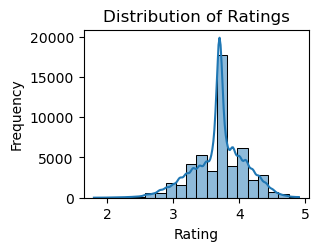

In [93]:
# Histogram of Ratings
plt.subplot(2, 2, 1)
sns.histplot(data1['rate'].dropna(), bins=20, kde=True)
plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")

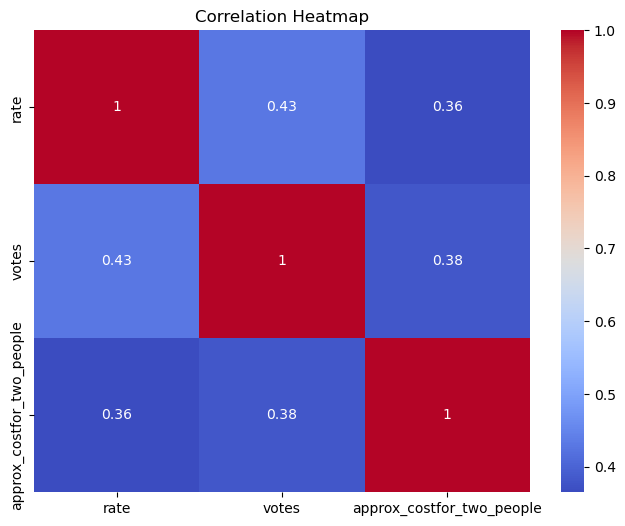

In [107]:
# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data1[['rate', 'votes', 'approx_costfor_two_people']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 6. Mapping Visualization

# 1. Restaurant Density Map

In [131]:
density_map = folium.Map(location=[12.9716, 77.5946], zoom_start=12)
heat_data = [[row['Latitude'], row['Longitude']] for index, row in merged_data1.iterrows()
             if not pd.isnull(row['Latitude']) and not pd.isnull(row['Longitude'])]

HeatMap(heat_data).add_to(density_map)

display(density_map)

# 2. Italian Restaurant Location Map

In [129]:
italian_map = folium.Map(location=[geo['Latitude'].mean(), geo['Longitude'].mean()],zoom_start=12)
for idx, row in geo.iterrows():
    if pd.notnull(row['Latitude']) and pd.notnull(row['Longitude']):
        folium.Marker(
            location=[row['Latitude'], row['Longitude']],
            icon=folium.Icon(color='green', icon='cutlery', prefix='fa')
        ).add_to(italian_map)

italian_map